#### Implementacao da funcao nao linear Softmax

A funcao Softmax e uma funcao de comportamento nao linear. Entender, a funcao as minucias da funcao Softmax e muito importante pois e largamente utilizada na area de Deep Learning. A sua Equacao e muito simples, e entende-la tambem. Veja a expressao da funcao Softmax e dada como sendo:

$$ \sigma = \frac {e^z}{\sum e^z}$$

Por mais que, o entendimento da Softmax seja muito simples, ela possui um caracter interpretativo bem mais profundo, vamos tentar entender alguns deles:

1. Vamos inicialmente tentar entender o comportamento, da funcao Softmax com um exemplo:


- Dado um conjunto inicial de valores: $z = [1,2,3]$ e sabendo que a funcao Softmax e dada como sendo: $ \sigma = \frac {e^z}{\sum e^z}$

Aplicando: 

$e^z = [e^1, e^2, e^3] = {2.72, 7.39, 20.01}$
               <br>
               $\sum e^z = 30.19$
               <br>
               $\sigma = {0.09, 0.24, 0.67}$

Portanto, veja que se somarmos todos os valores de $\sigma$ o resultado sera $\sigma = 1$

Este resultado, nos fornece uma primeira intepretacao muito valiosa. Pois sabemos que na funcao Softmax os valores de $\sigma$ se aproximam de $0$ a medida que tendemos $z$ a $-\infty$ E $\sigma$ se aproxima de 1 a medida que z se aproxima de $+\infty$. Com isso concluimos que a funcao Softmax possui imagem entre 0 a 1. 

Logo, como os valores estao em um intervalo entre 0 e 1 e que a **soma de todos os valores resultam em 1** podemos interpretar este resultado em termos de probabilidades.

E podemos fazer uma analogia que a funcao Softmax ela e como se "Maquina" chamada Softmaxerizer veja a imagem a seguir para entender o racicinio:

![Softmax](img/softmax.png)

Entao, se vermos a imagem temos (thing1, thing2, thing3) no qual estes sao 3 valores numericos quaisquer que entram na minha "Maquina de softmax" e na saida teremos: (p(thing1), p(thing2), p(thing3)) que representa a probabilidade de ocorrencia da input1, input2 e input3. E onde a soma das saidas deve somar 1.


Portanto, porque utilizar Softmax no Deep Learning, ou melhor porque ela e tao usada?

A reposta para esta pergunta e simples, normalmente em Deep Learning e Machine Learning, queremos que nossos modelos de aprendizagem aprendam a categorizar dados ou prever uma categoria de dados com base nos valores de entrada
para entender melhor imagine o seguinte cenario:

Imagine que eu tenho um dataset de imagens ou um conjunto de imagem, e vou dar como entrada do meu modelo essas imagens na qual as imagens sao:

- Input1: imagens de cachorro; (Categoria 1)
- Input2: imagens de gato; (Categoria 2)
- Input3: imagens de carro; (Categoria 3)

Porem, essas entradas sabemos que passarao por processo de normalizacao entre outras transformacoes ao longo do modelo. Logo nao e possivel tecer interpretacoes diretamente nesses valores totalmente arbitrarios. Entao o que podemos interpretar e que na saida existe:

- Output1: p(dog) = 0.8
- Output2: p(cat) = 0.1
- Output3: p(car) = 0.1

Portanto, a Softmax nos fornece uma interpretacao probablistica de que dado a entrada ela aprendeu que existe 80% de chance de que a imagem de entrada seja um cachorro. Ou seja ela mapeia a saida baseada em um dado de entrada.


### Implementacao da Softmax utilizando Numpy

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
# Inputs to Numpy
z_i = np.random.randint(-5, high = 15 , size = 25)
numerador = np.exp(z_i)
denominador = np.sum(np.exp(z_i))
sigma = numerador / denominador

print(sigma)

# Manual to Pytorch
z = [1,2,3]
numerador = np.exp(z)
denominador = np.sum(np.exp(z))
sigma2 = numerador / denominador

print(sigma2)

[2.02003562e-01 6.17933585e-08 2.49292201e-05 1.24115278e-06
 5.00716770e-04 2.27325062e-08 2.02003562e-01 2.27325062e-08
 3.07651016e-09 6.77646459e-05 2.73382093e-02 1.24115278e-06
 3.07651016e-09 6.77646459e-05 4.56594592e-07 6.77646459e-05
 1.00571652e-02 3.69982430e-03 3.69982430e-03 1.24115278e-06
 3.07651016e-09 4.56594592e-07 5.49102613e-01 4.56594592e-07
 1.36108930e-03]
[0.09003057 0.24472847 0.66524096]


#### Plotando o grafico da Softmax

[-4  3  0 12  9  0 -2  7  3 -1  6  2  9 -1 14 -3  6  8  0  2  3 -2 -5 13
 11]


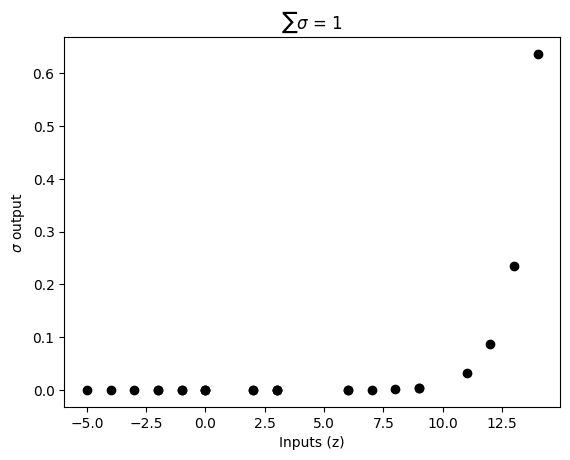

In [27]:
print(z_i)
plt.plot(z_i, sigma, 'ko')
plt.xlabel('Inputs (z)')
plt.ylabel('$\sigma$ output')
#plt.yscale('log') # Serve para visualizar valores mto pequenos pois na Softmax valores mto pequenos de z tendem a cair exponencialmente. E isso ajuda a visualizar quao acurado e o modelo.
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

#### Usando Pytorch para "implementar a Softmax"

In [30]:
softmax = nn.Softmax(dim = 0) # Tensor de ordem 0 (vetor simples)
sigmaT = softmax(torch.Tensor(z))

print(sigmaT)

tensor([0.0900, 0.2447, 0.6652])


Text(0.5, 1.0, 'Os dois metodos se correlacionam com r = 1.0')

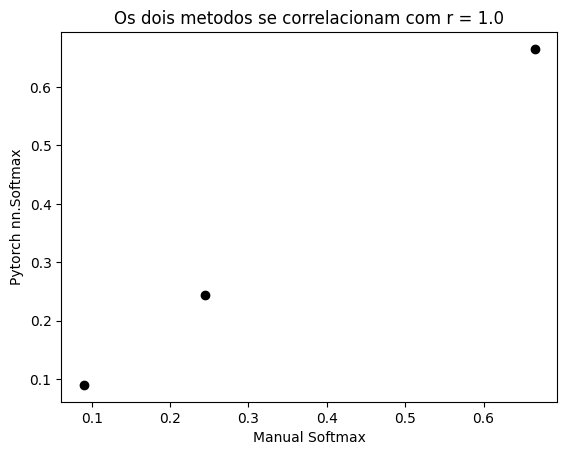

In [33]:
plt.plot(sigma2, sigmaT, 'ko')
plt.xlabel('Manual Softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'Os dois metodos se correlacionam com r = {np.corrcoef(sigma2,sigmaT)[0,1]}')